# Import Libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Regression models and other models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, KFold

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Model Parameter Girds and Lists

In [264]:
KNN_param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

Lasso_param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'max_iter': [1000, 5000, 10000],
        'tol': [0.0001, 0.001, 0.01]
    }

Ridge_param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg'],
        'max_iter': [1000, 5000, 10000]
    }

Elastic_param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [1000, 5000, 10000],
        'tol': [0.0001, 0.001, 0.01]
    }

RF_param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 6],
        'min_samples_leaf': [1, 3],
        'max_features': [None, 'sqrt', 'log2'],    # Replace 'auto' with None
        'bootstrap': [True, False]
    }

GrBoost_param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.8, 0.9]
    }

DT_param_grid = {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Updated criteria names
        'max_depth': [None, 10, 20],          # Maximum depth of the tree
        'min_samples_split': [2, 6],          # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at a leaf node
        'max_features': [None, 'sqrt', 'log2'],   # Removed 'auto'
        'splitter': ['best', 'random']            # Strategy to choose the split at each node
    }

BYS_param_grid = {
    'alpha_1': [1e-10, 1e-5, 1.0, 1e5],
    'alpha_2': [1e-10, 1e-5, 1.0, 1e5],
    'lambda_1': [1e-10, 1e-5, 1.0, 1e5],
    'lambda_2': [1e-10, 1e-5, 1.0, 1e5],
    'n_iter': [100, 200, 300, 400],
    'tol': [1e-4, 1e-3, 1e-2],
}

XG_param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 5, 7, 9],              # Maximum tree depth
    'min_child_weight': [1, 3, 5],          # Minimum sum of instance weight
    'subsample': [0.5, 0.7, 1.0],           # Subsample ratio of the training instance
    'colsample_bytree': [0.5, 0.7, 1.0],    # Subsample ratio of columns for each tree
    'gamma': [0, 0.1, 0.2],                  # Minimum loss reduction to make a further partition
    'reg_alpha': [0, 0.1, 0.5],              # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],             # L2 regularization term on weights
}

## REGRESSOR LIST
Regressors = [
        KNeighborsRegressor(), 
        Lasso(), 
        Ridge(), 
        ElasticNet(),
        RandomForestRegressor(), 
        GradientBoostingRegressor(),
        DecisionTreeRegressor(),
        BayesianRidge(),
        XGBRegressor()
    ]

## PARAMETER GRID LIST
param_grid_list = [
    KNN_param_grid,        # K-Nearest Neighbors
    Lasso_param_grid,      # Lasso Regression
    Ridge_param_grid,      # Ridge Regression
    Elastic_param_grid,    # ElasticNet Regression
    RF_param_grid,         # Random Forest
    GrBoost_param_grid,    # Gradient Boosting
    DT_param_grid,
    BYS_param_grid,
    XG_param_grid
    ]

# Import Data

In [265]:
audi_df = pd.read_csv("audi.csv")
bmw_df = pd.read_csv("bmw.csv")
cclass_df = pd.read_csv("cclass.csv")
focus_df = pd.read_csv("focus.csv")
ford_df = pd.read_csv("ford.csv")
hyundai_df = pd.read_csv("hyundi.csv")
merc_df = pd.read_csv("merc.csv")
skoda_df = pd.read_csv("skoda.csv")
toyota_df = pd.read_csv("toyota.csv")
vw_df = pd.read_csv("vw.csv")
vauxhall_df = pd.read_csv("vauxhall.csv")

In [266]:
df_list = [
     audi_df, bmw_df, cclass_df, 
     focus_df, ford_df, hyundai_df,
     merc_df, skoda_df, toyota_df, 
     vw_df, vauxhall_df
    ]
car_list = [
        "audi", "bmw", "cclass", "focus", 
        "ford", "hyundai", "merc", "skoda", 
        "toyota", "volkswagen", "vauxhall"
    ]

# Taking the First Input and Dataframe Selection

In [267]:
Car_list = ["Audi","Bmw","Cclass","Ford","Focus","Hyundai","Mercedes",
            "Skoda","Toyota","Volkswagen","Vauxhall"]

CarName = input("Please select one of the following cars: {} ".format(Car_list))

# Input to DataFrame conversion
for i in range(len(Car_list)):
    
    if CarName.capitalize() == Car_list[i]:
        selected_df = df_list[i]
        break

Please select one of the following cars: ['Audi', 'Bmw', 'Cclass', 'Ford', 'Focus', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota', 'Volkswagen', 'Vauxhall'] Audi


In [268]:
selected_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [269]:
selected_df["model"].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

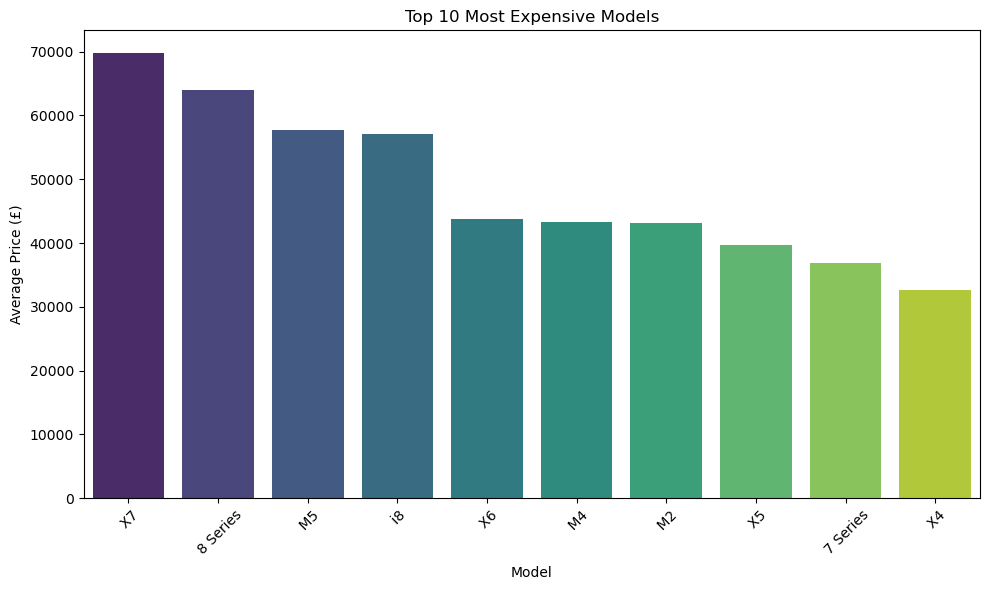

In [226]:
# Group by model and calculate average price
average_prices = selected_df.groupby('model')['price'].mean().reset_index()

# Sort by average price in descending order and select top 10
top_expensive_models = average_prices.sort_values(by='price', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='price', data=top_expensive_models, palette='viridis')
plt.title('Top 10 Most Expensive Models')
plt.xlabel('Model')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

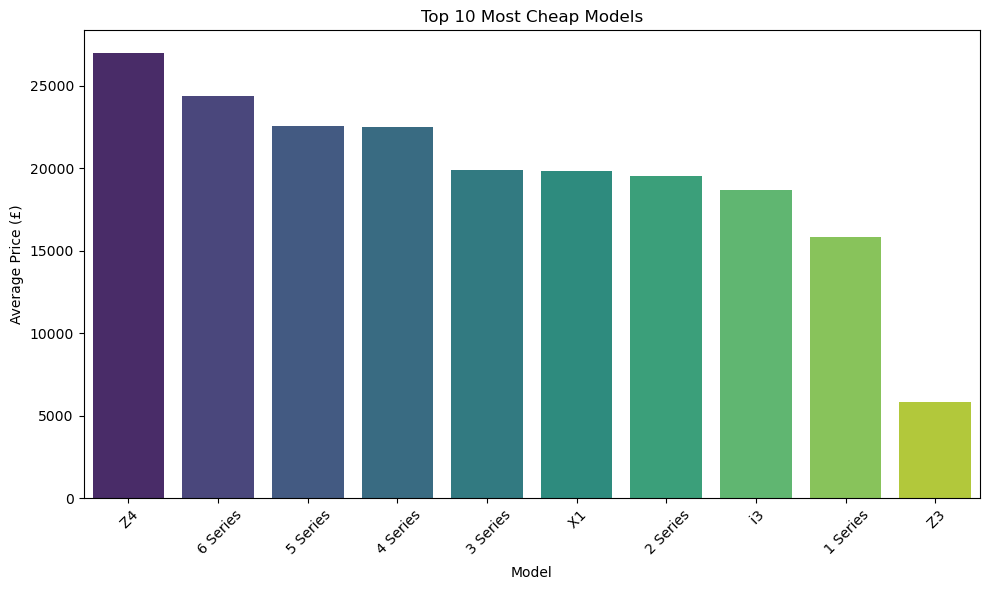

In [227]:
# Group by model and calculate average price
average_prices = selected_df.groupby('model')['price'].mean().reset_index()

# Sort by average price in descending order and select top 10
top_cheapest_models = average_prices.sort_values(by='price', ascending=False).tail(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='price', data=top_cheapest_models, palette='viridis')
plt.title('Top 10 Most Cheap Models')
plt.xlabel('Model')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

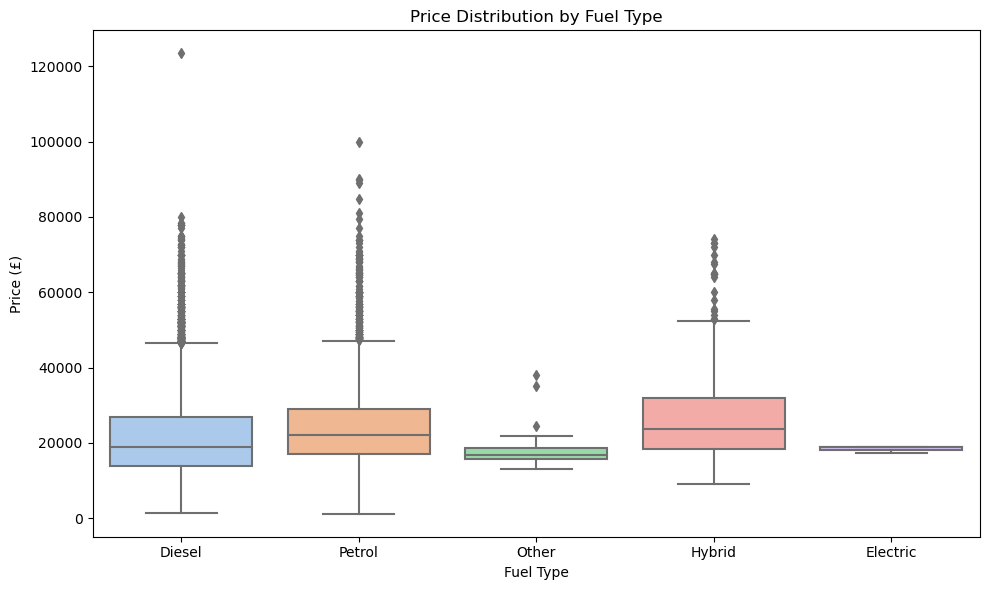

In [228]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=selected_df, palette='pastel')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (£)')
plt.tight_layout()  # Adjusts layout
plt.show()

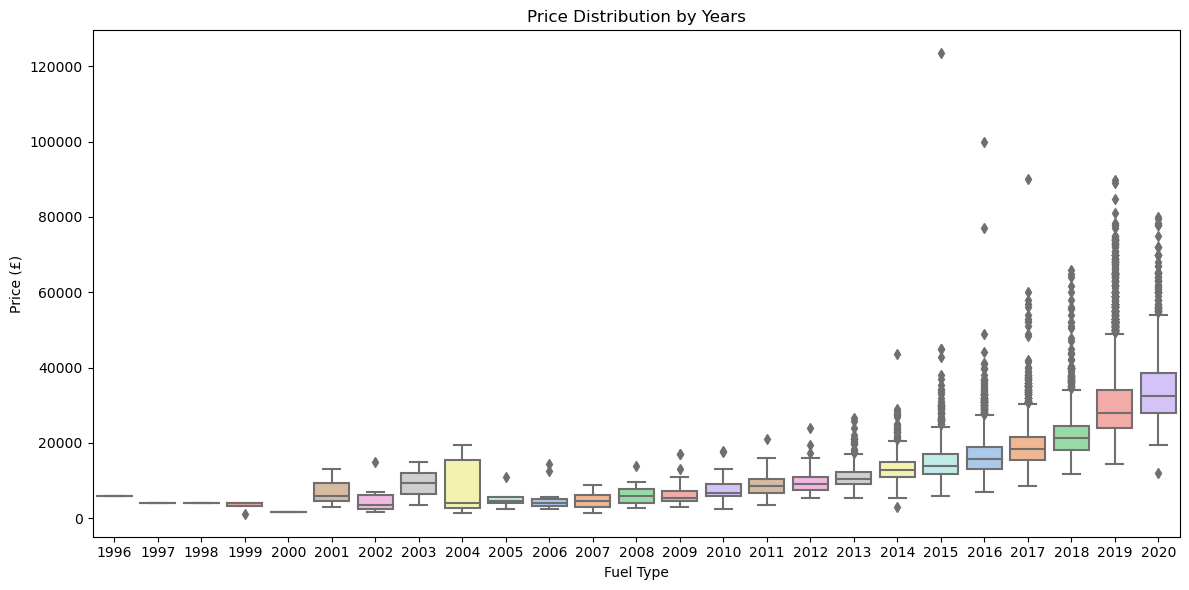

In [229]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=selected_df, palette='pastel')
plt.title('Price Distribution by Years')
plt.xlabel('Fuel Type')
plt.ylabel('Price (£)')
plt.tight_layout()  # Adjusts layout
plt.show()

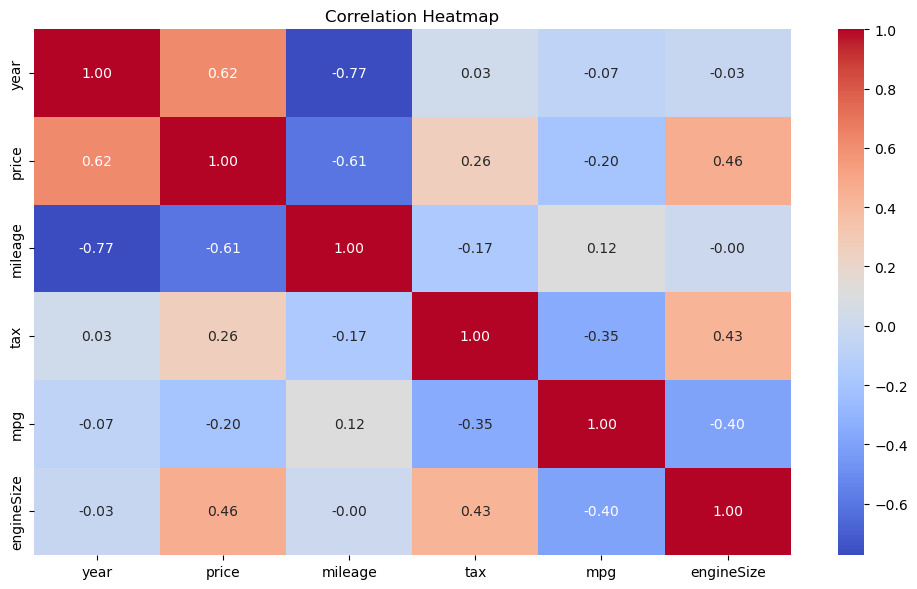

In [230]:
plt.figure(figsize=(10, 6))
correlation = selected_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()  # Adjusts layout
plt.show()

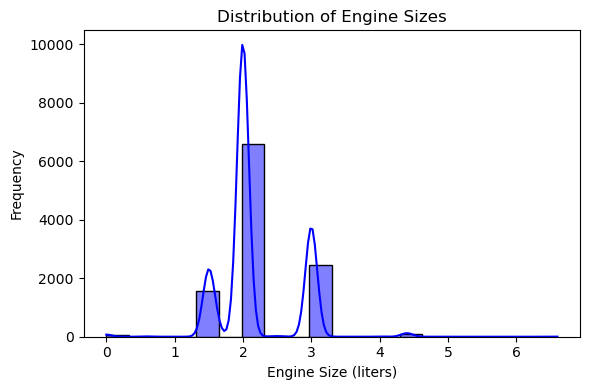

In [231]:
plt.figure(figsize=(6, 4))
sns.histplot(selected_df['engineSize'], bins=20, kde=True, color='blue')
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjusts layout
plt.show()

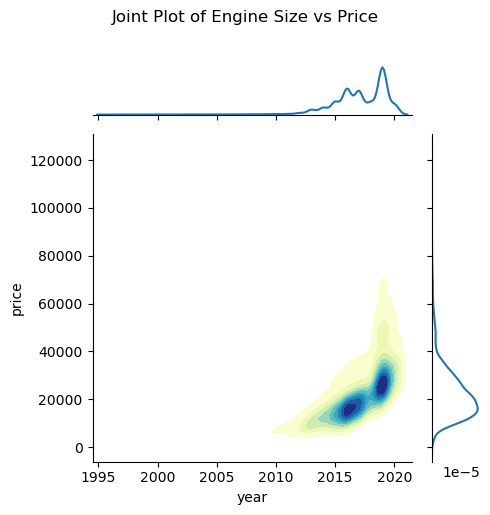

In [232]:
sns.jointplot(x='year', y='price', data=selected_df, kind='kde', height=5, shade = True, cmap = "YlGnBu")

# Set title and show the plot
plt.suptitle('Joint Plot of Engine Size vs Price', y=1.02)
plt.tight_layout()  # Adjust layout
plt.show()

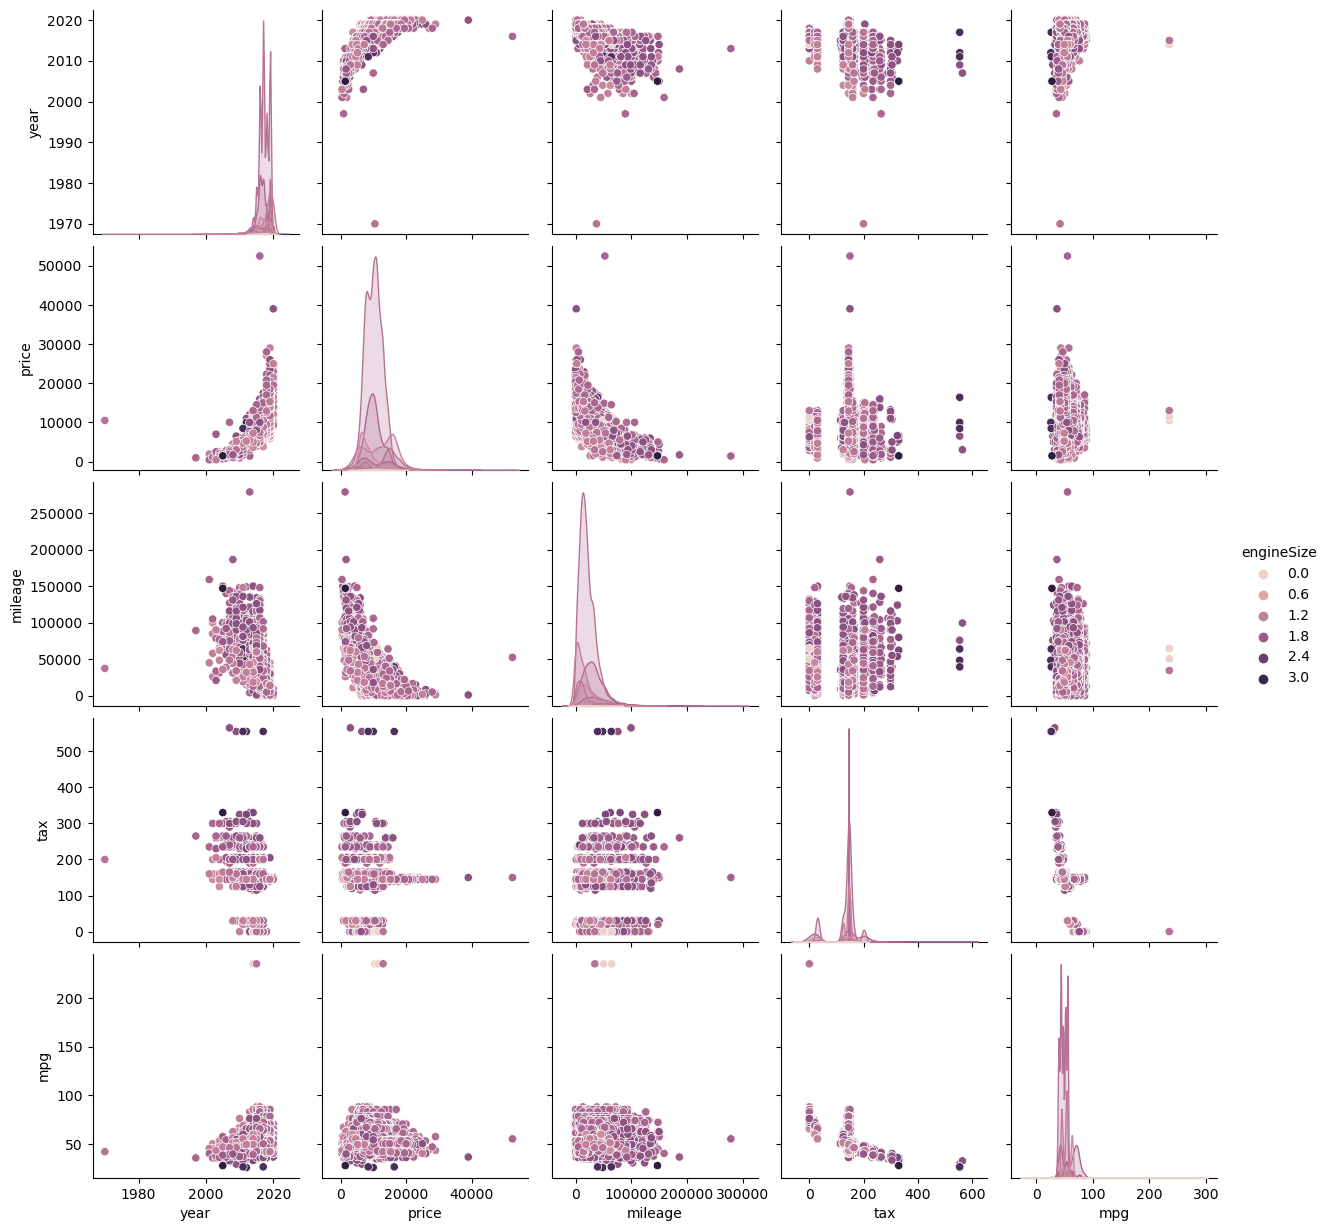

In [212]:
sns.pairplot(selected_df.select_dtypes(["number"]), hue = "engineSize")

In [270]:
average_prices = selected_df.groupby('model')['price'].mean().reset_index()

# Sort by average price in descending order
average_prices_sorted = average_prices.sort_values(by='price', ascending=False)

# Display the results
print(average_prices_sorted)

   model         price
13    R8  97652.214286
12    Q8  60115.014493
17   RS6  55963.871795
16   RS5  51265.206897
15   RS4  50151.612903
24   SQ7  49269.000000
11    Q7  44788.319899
7     A8  34981.847458
14   RS3  34050.515152
22    S8  33807.750000
18   RS7  33490.000000
23   SQ5  31415.812500
20    S4  31248.083333
10    Q5  30445.688712
6     A7  28865.516393
4     A5  23577.114512
9     Q3  22999.261821
5     A6  22695.385027
8     Q2  22516.975669
25    TT  21784.452381
19    S3  20379.444444
3     A4  20255.450398
2     A3  17408.522032
21    S5  15980.000000
0     A1  14327.750557
1     A2   2490.000000


In [271]:
"""
# Calculate average prices for each model
average_prices = selected_df.groupby('model')['price'].mean().reset_index()

# Sort models by average price
average_prices_sorted = average_prices.sort_values(by='price').reset_index(drop=True)

# Automatically create groups based on sorted average prices
n_groups = 6
models_per_group = len(average_prices_sorted) // n_groups

# Create grouped_members dictionary to hold groups and their members
grouped_members = {f"Group {i + 1}": [] for i in range(n_groups)}

for i in range(n_groups):
    start_idx = i * models_per_group
    if i == n_groups - 1:  # Last group may include remaining models
        end_idx = len(average_prices_sorted)
    else:
        end_idx = start_idx + models_per_group

    # Add models to the current group
    grouped_members[f"Group {i + 1}"] = average_prices_sorted['model'].iloc[start_idx:end_idx].tolist()

# Display the grouped_members
print(grouped_members)

# Now, to add these groups to the selected_df
for group in grouped_members:
    selected_df[group] = selected_df['model'].apply(lambda x: 1 if x in grouped_members[group] else 0)

# Optionally, drop the original model column if needed
# selected_df = selected_df.drop(columns=["model"])

# Display the updated DataFrame
selected_df.head()
"""

'\n# Calculate average prices for each model\naverage_prices = selected_df.groupby(\'model\')[\'price\'].mean().reset_index()\n\n# Sort models by average price\naverage_prices_sorted = average_prices.sort_values(by=\'price\').reset_index(drop=True)\n\n# Automatically create groups based on sorted average prices\nn_groups = 6\nmodels_per_group = len(average_prices_sorted) // n_groups\n\n# Create grouped_members dictionary to hold groups and their members\ngrouped_members = {f"Group {i + 1}": [] for i in range(n_groups)}\n\nfor i in range(n_groups):\n    start_idx = i * models_per_group\n    if i == n_groups - 1:  # Last group may include remaining models\n        end_idx = len(average_prices_sorted)\n    else:\n        end_idx = start_idx + models_per_group\n\n    # Add models to the current group\n    grouped_members[f"Group {i + 1}"] = average_prices_sorted[\'model\'].iloc[start_idx:end_idx].tolist()\n\n# Display the grouped_members\nprint(grouped_members)\n\n# Now, to add these group

# Data Preprocessing Function

In [298]:
def Preprocessing(df):
    
    df = df.sort_values("price",ascending = False)
    outlier_length = len(df) * 0.01 
    df = df.iloc[int(outlier_length):]
    df_dummies = pd.get_dummies(df, columns = ["model","transmission","fuelType"])
    
    train = df_dummies
    train = train.head(1000) # Minimizing the data for more efficient memory usage and less time
    return train

In [299]:
pre_data =  Preprocessing(selected_df).head()
pre_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
7221,2020,59995,2000,150,40.9,3.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
222,2019,59995,10,145,33.2,3.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5129,2019,59990,3988,145,32.8,3.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4100,2019,59990,5121,145,29.1,2.9,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4669,2020,59990,799,145,33.2,3.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Train Test Split

In [300]:
# Features and target variable
X_train = pre_data.drop("price", axis=1)
y_train = pre_data["price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                test_size=0.3, random_state=42)

train_test_split_list = [X_train, X_test, y_train, y_test]
test_version = ["X_train", "X_test", "y_train", "y_test"]

for i in range(len(train_test_split_list)):
    print(test_version[i])
    print(train_test_split_list[i].shape)
    print(train_test_split_list[i].head())


X_train
(3, 37)
      year  mileage  tax   mpg  engineSize  model_ A1  model_ A2  model_ A3  \
5129  2019     3988  145  32.8         3.0          0          0          0   
7221  2020     2000  150  40.9         3.0          0          0          0   
4100  2019     5121  145  29.1         2.9          0          0          0   

      model_ A4  model_ A5  ...  model_ S8  model_ SQ5  model_ SQ7  model_ TT  \
5129          0          0  ...          0           0           0          0   
7221          0          1  ...          0           0           0          0   
4100          0          0  ...          0           0           0          0   

      transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
5129                       1                    0                       0   
7221                       0                    0                       1   
4100                       1                    0                       0   

      fuelType_Diesel  fuelType_H

# Grid Search Function

In [303]:
def GridSearch(regressors, param_grid_list, X_train, y_train):
    
    best_models = []
    best_scores = []

    # Iterate over each regressor and parameter grid
    for regressor, param_grid in zip(regressors, param_grid_list):
        print(f"Performing Grid Search for {regressor.__class__.__name__}")

        # Initialize GridSearchCV for each regressor
        grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                                   scoring='r2', cv=3, n_jobs=-1, verbose=1)

        # Fit the grid search
        grid_search.fit(X_train, y_train)

        # Store the best model and its score
        best_models.append(grid_search.best_estimator_)
        best_scores.append(grid_search.best_score_)
        
    return best_models, best_scores

In [304]:
GridSearch(Regressors, param_grid_list, X_train, y_train)

Performing Grid Search for KNeighborsRegressor
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Performing Grid Search for Lasso
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Performing Grid Search for Ridge
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Performing Grid Search for ElasticNet
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Performing Grid Search for RandomForestRegressor
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Performing Grid Search for GradientBoostingRegressor
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Performing Grid Search for DecisionTreeRegressor
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


([KNeighborsRegressor(n_neighbors=3),
  Lasso(alpha=0.1),
  Ridge(alpha=0.1, max_iter=1000, solver='svd'),
  ElasticNet(alpha=0.1, l1_ratio=0.1),
  RandomForestRegressor(max_features=None),
  GradientBoostingRegressor(learning_rate=0.01, subsample=0.8),
  DecisionTreeRegressor()],
 [nan, nan, nan, nan, nan, nan, nan])

In [131]:
Car_list = ["Audi","Bmw","Cclass","Ford","Focus","Hyundai","Mercedes",
            "Skoda","Toyota","Volkswagen","Vauxhall"]

CarName = input("Please select one of the following cars: {} ".format(Car_list))

# Input to DataFrame conversion
for i in range(len(Car_list)):
    
    if CarName.capitalize() == Car_list[i]:
        new_selected_df = df_list[i]
        break

Please select one of the following cars: ['Audi', 'Bmw', 'Cclass', 'Ford', 'Focus', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota', 'Volkswagen', 'Vauxhall'] audi


In [285]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the Bayesian Ridge model
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)

# Make predictions
y_pred_bayesian = model_bayesian.predict(X_test)

# Calculate metrics
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("Bayesian Regression MSE:", mse_bayesian)
print("Bayesian Regression R^2:", r2_bayesian)

Bayesian Regression MSE: 18014976.154705897
Bayesian Regression R^2: 0.6630598230918863


In [241]:
model6 = RandomForestRegressor(n_estimators=240,        
    max_depth=20,min_samples_split=5,min_samples_leaf=3)
# Fit the model to the training data
model6.fit(X_train, y_train)
    
# Optionally, make predictions or evaluate the model
y_pred = model6.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

9309938.59133467
0.8528036900424327


In [290]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor model
model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=20,
    learning_rate=0.1,  # You can adjust this based on your needs
    min_child_weight=3,  # Similar to min_samples_leaf
    subsample=0.8        # Controls overfitting
)

# Fit the model to the training data
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("XGBoost MSE:", mse_xgb)
print("XGBoost R^2:", r2_xgb)


XGBoost MSE: 10590612.61470005
XGBoost R^2: 0.8019202351570129


In [255]:
model5 = GradientBoostingRegressor(n_estimators= 200, learning_rate=0.22,
    max_depth=3, min_samples_split=5, subsample=0.9)

# Fit the model to the training data
model5.fit(X_train, y_train)
    
# Optionally, make predictions or evaluate the model
y_pred = model5.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

7915054.353778975
0.8748577358958908


In [244]:
model8 = DecisionTreeRegressor(criterion='friedman_mse',max_depth=20,
   min_samples_split=5,min_samples_leaf=2,            
    max_features ='sqrt',  
    splitter='best')
# Fit the model to the training data
model8.fit(X_train, y_train)
    
# Optionally, make predictions or evaluate the model
y_pred = model8.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

13858226.385127436
0.7808922404336807


# Model Application Function

In [275]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
Preprocessing(selected_df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 7221 to 3138
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1750 non-null   int64  
 1   price                   1750 non-null   int64  
 2   mileage                 1750 non-null   int64  
 3   tax                     1750 non-null   int64  
 4   mpg                     1750 non-null   float64
 5   engineSize              1750 non-null   float64
 6   model_ A1               1750 non-null   uint8  
 7   model_ A2               1750 non-null   uint8  
 8   model_ A3               1750 non-null   uint8  
 9   model_ A4               1750 non-null   uint8  
 10  model_ A5               1750 non-null   uint8  
 11  model_ A6               1750 non-null   uint8  
 12  model_ A7               1750 non-null   uint8  
 13  model_ A8               1750 non-null   uint8  
 14  model_ Q2               1750 non-null

In [276]:

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = Sequential()

    model.add(Dense(12, activation="relu"))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(12, activation="relu"))

    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")

    


An error occurred: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
model.fit(x = X_train, y = y_train, validation_data=(X_test,y_test),batch_size=250,epochs=300)

In [18]:
for df in df_list:
    splitted = str(df).split("_")
        
    if CarName.lower() == splitted[0]:
            CarModel = input("Please select one of the following models: {} ".format(
                df['model'].unique().tolist()))
            if CarModel not in df["model"].unique():
                print("Please enter a valid input, consider capital letters!")
            transmission_type = input("Please select one of the following transmission type: {}".format(
                          df['transmission'].unique().tolist()))

            milage = int(input("Please enter your prefered milage: "))
            fuelType = input("Please enter one of the following fuel type: {}".format(
                              df['fuelType'].unique().tolist()))
            mpg = int(input("Please enter your prefered mpg value: "))
            engine_size = int(input("Please enter your prefered engine size: "))
            
CarFeatures = np.array(CarName.capitalize(), CarModel, transmission_type, milage, fuelType, mpg, engine_size)

Car_Features = InputCollection(CarName)

NameError: name 'CarModel' is not defined

In [28]:
for i in range(len(df_list)):
    print(df_list[i].head(2))

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   

   engineSize  
0         2.0  
1         2.0  
      model  year  price transmission  mileage fuelType  engineSize
0   C Class  2020  30495    Automatic     1200   Diesel         2.0
1   C Class  2020  29989    Automatic     1000   Petrol         1.5
    model  year  price transmission  mileage fuelType  engineSize
0   Focus  2016   8000       Manual    38852   Petrol         1.0
1   Focus  2019  13400       Manual    11952   Petrol         1.0
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automa

In [29]:
for i in range(len(df_list)):
    DF = df_list[i]
    DF = DF.sort_values("price",ascending=False)
    outlier_length = len(DF) * 0.01
    DF = DF.iloc[int(outlier_length):]

In [30]:
ford_df = ford_df.sort_values("price",ascending = False)
outlier_length = len(ford_df) * 0.01
ford_df = ford_df.iloc[int(outlier_length):]
ford_df = pd.get_dummies(ford_df, columns = ["model","transmission","fuelType"])

ford_df

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
3687,2016,26475,12000,570,20.9,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4374,2019,26430,9129,145,55.4,2.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3328,2019,26360,2725,145,55.4,2.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11191,2019,26299,3764,145,34.5,2.3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13824,2020,26290,7,135,47.1,2.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,2008,694,82020,145,47.1,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
14222,2005,675,97000,205,48.7,2.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
16904,2005,675,121000,235,39.8,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
16811,2005,675,108000,260,36.2,1.8,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
audi_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [36]:
audi_param_list = []
bmw_param_list = []
cclass_param_list = []
focus_param_list = []
ford_param_list = []
hyundi_param_list = []
merc_param_list = []
skoda_param_list = []
toyota_param_list = []
vw_param_list = []
vauxhall_param_list = []

best_param_lists = [audi_param_list, bmw_param_list, cclass_param_list,
                    focus_param_list, ford_param_list, hyundi_param_list,
                    merc_param_list, skoda_param_list, toyota_param_list,
                    vw_param_list, vauxhall_param_list]

In [ ]:


param_list = ford_param_list

# Use ShuffleSplit cross-validator to avoid issues with small class sizes
shuffle_split = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# Iterate over the regressors and their corresponding param grids
for regressor, param_grid in zip(Regressors, param_grid_list):
        # Create GridSearchCV instance with ShuffleSplit as the cross-validator
        grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, n_jobs=-1)
        
        # Fit the model on the training data
        grid_search.fit(X_train, y_train)
        
        # Get the best model and print the best parameters
        print((regressor, grid_search.best_params_))  
        

(KNeighborsRegressor(), {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'})


C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+09, tolerance: 2.332e+07
  model = cd_fast.enet_coordinate_descent(


(Lasso(), {'alpha': 0.1, 'max_iter': 5000, 'tol': 0.0001})
(Ridge(), {'alpha': 0.1, 'max_iter': 1000, 'solver': 'svd'})
(ElasticNet(), {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.0001})


In [38]:
train = ford_df
    
# Features and target variable
X_train = train.drop("price", axis=1)
y_train = train["price"]
    
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                            test_size=0.3, random_state=42)
    

In [62]:
audi_param_list

[KNeighborsRegressor(),
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
 Lasso(),
 {'alpha': 10.0, 'max_iter': 1000, 'tol': 0.0001},
 Ridge(),
 {'alpha': 10.0, 'max_iter': 1000, 'solver': 'lsqr'},
 ElasticNet(),
 {'alpha': 10.0, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.0001},
 SVR(),
 {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'},
 RandomForestRegressor(),
 {'bootstrap': False,
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 GradientBoostingRegressor(),
 {'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_split': 2,
  'n_estimators': 100,
  'subsample': 0.8},
 LogisticRegression(),
 {'C': 0.01,
  'class_weight': None,
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 DecisionTreeRegressor(),
 {'criterion': 'squared_error',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'}]

In [39]:

KNN = KNeighborsRegressor(algorithm = "auto", n_neighbors = 3, weights = "distance")
Lass_model = Lasso(alpha = 10.0, max_iter = 1000, tol = 0.0001)
Ridg_model = Ridge(alpha = 10.0, max_iter = 1000, solver = "lsqr")
ENet = ElasticNet(alpha = 10.0, l1_ratio = 0.9, max_iter = 1000, tol = 0.0001)
SV_model = SVR(C = 0.1, epsilon = 0.1, gamma = "scale", kernel = "sigmoid")
RFR = RandomForestRegressor(bootstrap = False, max_depth = None, max_features = None, 
                            min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
GBR = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_split = 2,
                                n_estimators = 100, subsample = 0.8)
Lreg = LogisticRegression(C = 0.01, class_weight = None, max_iter = 100, penalty = 'l2',
                          solver = 'newton-cg')
DTR = DecisionTreeRegressor(criterion = 'squared_error',max_depth = None, max_features = None,
                            min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')

Regressor_list = [KNN, Lasso, Ridge, ENet, SVR, RFR, GBR, Lreg, DTR]
for q in range(len(Regressor_list)):
    r2 = r2_score(y_test, Regressor_list[q].fit(X_train, y_train).predict(X_test))
    print("R² score:", r2)

R² score: 0.30832436732352764


AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [64]:
cclass_param_list

[]

In [47]:


if CarName.lower() == "audi":
    CarModel = input("Please select one of the following models: {} ".format(
        audi_df['model'].unique().tolist()))
    predict = 
    
elif CarName.lower() == "bmw":
    CarModel = input("Please select one of the following models: {} ".format(
        bmw_df['model'].unique().tolist()))
    
elif CarName.lower() == "cclass":
    CarModel = input("Please select one of the following models: {} ".format(
        cclass_df['model'].unique().tolist()))
    
elif CarName.lower() == "ford":
    CarModel = input("Please select one of the following models: {} ".format(
        ford_df['model'].unique().tolist()))
    
elif CarName.lower() == "focus":
    CarModel = input("Please select one of the following models: {} ".format(
        focus_df['model'].unique().tolist()))
    
elif CarName.lower() == "hyundai":
    CarModel = input("Please select one of the following models: {} ".format(
        hyundi_df['model'].unique().tolist()))
    
elif CarName.lower() == "mercedes":
    CarModel = input("Please select one of the following models: {} ".format(
        merc_df['model'].unique().tolist()))
    
elif CarName.lower() == "skoda":
    CarModel = input("Please select one of the following models: {} ".format(
        skoda_df['model'].unique().tolist()))
    
elif CarName.lower() == "toyota":
    CarModel = input("Please select one of the following models: {} ".format(
        toyota_df['model'].unique().tolist()))

elif CarName.lower() == "volkswagen":
    CarModel = input("Please select one of the following models: {} ".format(
        vw_df['model'].unique().tolist()))

elif CarName.lower() == "vauxhall":
    CarModel = input("Please select one of the following models: {} ".format(
        vauxhall_df['model'].unique().tolist()))

else:
    print("Please enter one of the values in the mentioned pool!")

transmission_type = input("Please select one of the following transmission type: {}".format(
                          merc_df['transmission'].unique().tolist()))

milage = int(input("Please enter your prefered milage: "))
fuelType = input("Please enter one of the following fuel type: {}".format(
                  merc_df['fuelType'].unique().tolist()))
mpg = int(input("Please enter your prefered mpg value: "))
engine_size = int(input("Please enter your prefered engine size: "))

def EnterInfo():
    return (CarName, CarModel, transmission_type, milage, fuelType, mpg, engine_size)

Please select one of the following cars: ['Audi', 'Bmw', 'Cclass', 'Ford', 'Focus', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota', 'Volkswagen', 'Vauxhall']Audi
